## cancer prediction EDA

In [3]:
import pandas as pd

In [7]:
import numpy as np

In [8]:
import seaborn as sns

In [9]:
data = pd.read_csv(r"/content/The_Cancer_data_1500_V2.csv")

In [10]:
data.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
data.isnull().sum()

,0
Age,0
Gender,0
BMI,0
Smoking,0
GeneticRisk,0
PhysicalActivity,0
AlcoholIntake,0
CancerHistory,0
Diagnosis,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

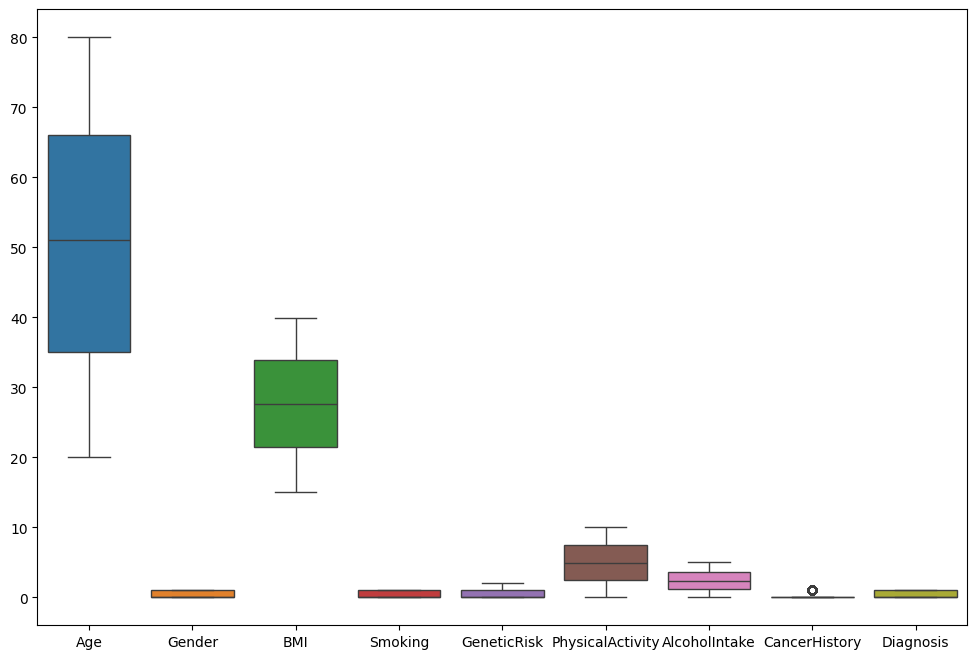

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data,ax= ax)

In [16]:
data['CancerHistory'].unique()

array([1, 0])

## now we standardise the data

<Axes: >

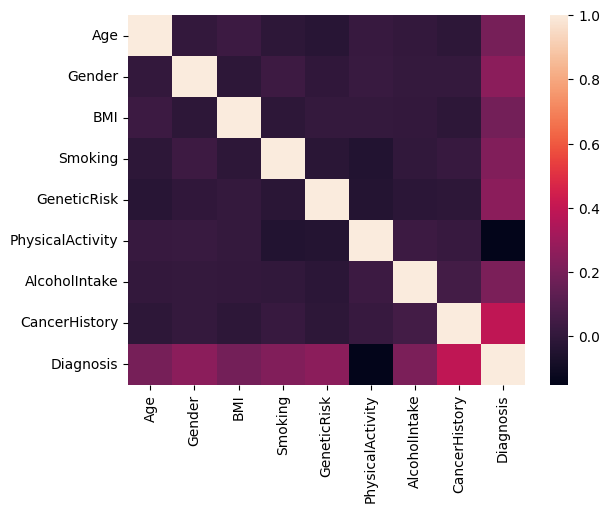

In [17]:
sns.heatmap(data.corr())

## form the data we can say that
1) smoking , geneticrisk,alcoholintake,cancerhistory is directly propotional to diagnosis

## now we will do train test split

In [18]:
from sklearn.model_selection import train_test_split

In [21]:
x = data.iloc[:,0:8]

In [22]:
x

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory
0,58,1,16.085313,0,1,8.146251,4.148219,1
1,71,0,30.828784,0,1,9.361630,3.519683,0
2,48,1,38.785084,0,2,5.135179,4.728368,0
3,34,0,30.040296,0,0,9.502792,2.044636,0
4,62,1,35.479721,0,0,5.356890,3.309849,0
...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0
1496,31,0,33.447125,0,1,1.668297,2.280636,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0
1498,55,0,25.568216,0,0,7.795317,1.986138,1


In [23]:
Y = data.iloc[:,[-1]]

In [25]:
Y

,Diagnosis
0,1
1,0
2,1
3,0
4,1
...,...
1495,1
1496,1
1497,1
1498,1


In [26]:
split = train_test_split

In [27]:
X_train,X_test,Y_train,Y_test = split(x,Y,test_size = 0.20 ,random_state = 42)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

<Axes: >

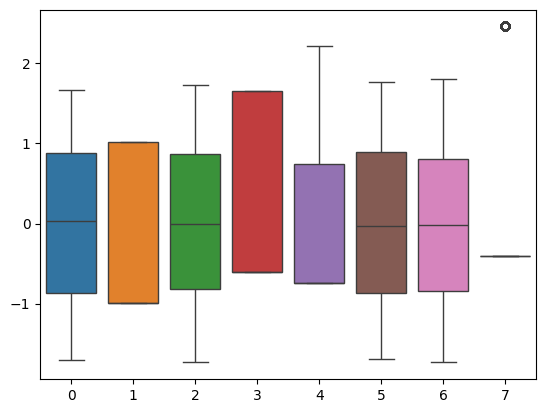

In [29]:
sns.boxplot(X_train_scaled)

<Axes: >

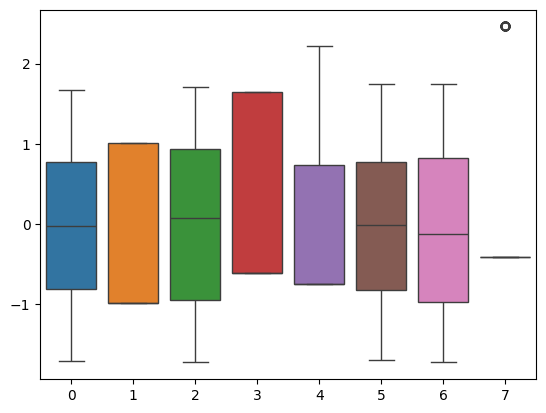

In [30]:
sns.boxplot(X_test_scaled)

In [31]:
# Now we impliment the alogirithm of ML to get result

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
regression = LogisticRegression()

In [34]:
regression

LogisticRegression()

In [35]:
regression.fit(X_train_scaled,Y_train)

LogisticRegression()

In [36]:
y_pred = regression.predict(X_test_scaled)

In [37]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [38]:
# now we are calculate the confusion matrix , acurracy , precion , recall and more

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [40]:
print(confusion_matrix(Y_test,y_pred))

[[171  13]
 [ 28  88]]


In [41]:
print(accuracy_score(Y_test,y_pred))

0.8633333333333333


# Now i get 80.33% accuracy then i have to do hyperparameter tunning so i can have better result

In [42]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       184
           1       0.87      0.76      0.81       116

    accuracy                           0.86       300
   macro avg       0.87      0.84      0.85       300
weighted avg       0.86      0.86      0.86       300



In [43]:
import pickle
pickle.dump(regression,open('model.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))